# Basic Circuits

## Create a Circuit

To create a Circuit we first need to define how many **Qubits** it has and how many **output bits**.

In [11]:
# First we import the QuantumCircuit Library
from qiskit import QuantumCircuit, execute, Aer

# Create a Quantum Circuit with 8 qubits and 8 output bits
num_qubits = 8
num_output_bits = 8
quantum_circuit = QuantumCircuit(num_qubits, num_output_bits)


### Measure the output
To measure the output we define what qubit to read and in what bit to set the output.


In [12]:
# quantum_circuit.measure(0,0)
# quantum_circuit.measure(1,1)
# etc

# We comment it so we don't affect the next example (the alternative).

Alternative

In [13]:
for j in range(8):
    quantum_circuit.measure(j,j)

### Draw the circuit
To draw the circuit we have a very simple method:

In [14]:
quantum_circuit.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

### Plot the results of measurement
If we want to plot on an histogram what we have measured we can do so with <code>plot_histogram(\<number-to-plot\>)</code>.</br>
As we are using a Quantum Simulator, it will execute a number of times (1024 times) to get a result.

{'00000000': 1024}


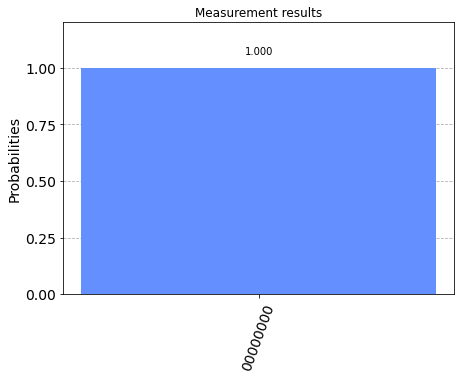

In [20]:
from qiskit.visualization import plot_histogram

counts = execute(quantum_circuit, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

# plot_histogram(data, figsize=(7, 5), color=None, number_to_keep=None, 
#     sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None)

plot_histogram(counts, title = "Measurement results")

## Encoding an input

### Not-Gate

To perform a Not-Gate on our circuit, we use the method <code>QuantumCircuit.x()<\code>

In [28]:
quantum_circuit_2 = QuantumCircuit(num_qubits)
quantum_circuit_2.x(7)

quantum_circuit_2.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

### Combine defined Circuits
We have before created quantum_circuit, which measures all 8 Qubits and sets the output.</br>
We now have created a second circuit, which performs a Not-Gate on the last Qubit.

Both circuits can be combined to create a single one with the steps from one and the other.

In [36]:
quantum_circuit_combined = quantum_circuit_2 + quantum_circuit
quantum_circuit_combined.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

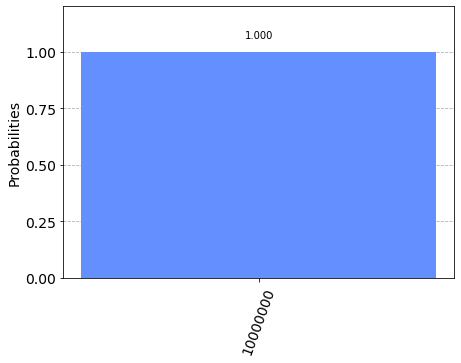

In [37]:
# And we can check the results as before:
counts = execute(quantum_circuit_combined,Aer.get_backend('qasm_simulator')).result().get_counts()

plot_histogram(counts)

### CNOT-Gate
Like a classical XOR Gate. In Qiskit its name is <code>cx</code>

In [38]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

### CNOT Table
We are going to try all four possible situations and check the output

![CNOT-Table](img/img001.png)

#### Case 00 -> 00

In [48]:
qc00 = QuantumCircuit(2,2)
qc00.cx(0,1)
qc00.measure(0,0)
qc00.measure(1,1)

qc00.draw()

┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

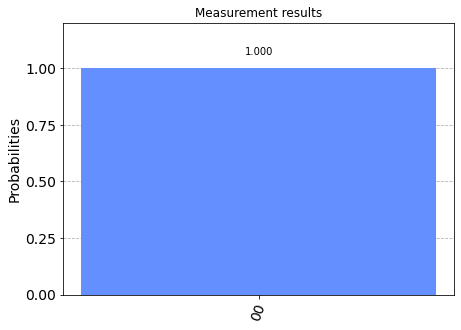

In [49]:
counts = execute(qc00, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

#### Case 01 -> 11

In [53]:
qc01 = QuantumCircuit(2,2)
qc01.x(0) # Remember it goes from right to left, so 01 means 0 is qubit one and 1 is qubit zero.
qc01.cx(0,1)
qc01.measure(0,0)
qc01.measure(1,1)

qc01.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

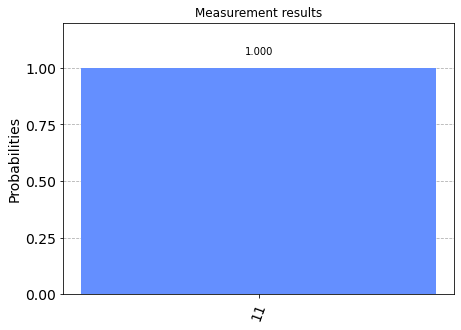

In [54]:
counts = execute(qc01, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

#### Case 10 -> 10

In [56]:
qc02 = QuantumCircuit(2,2)
qc02.x(1) 
qc02.cx(0,1)

# Remember it goes from right to left, so 01 means 0 is qubit one and 1 is qubit zero.
qc02.measure(0,0)
qc02.measure(1,1)

qc02.draw()

┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

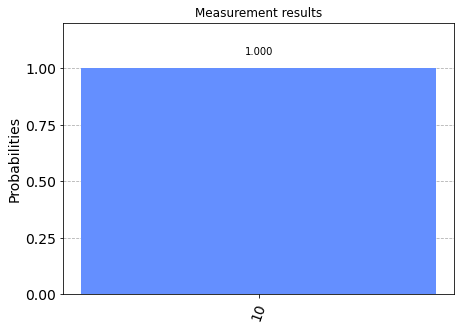

In [57]:
counts = execute(qc02, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

#### Case 11 -> 01

In [65]:
qc03 = QuantumCircuit(2,2)
qc03.x(0) # Remember it goes from right to left, so 01 means 0 is qubit one and 1 is qubit zero.
qc03.x(1)
qc03.cx(0,1)
qc03.measure(0,0)
qc03.measure(1,1)


qc03.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

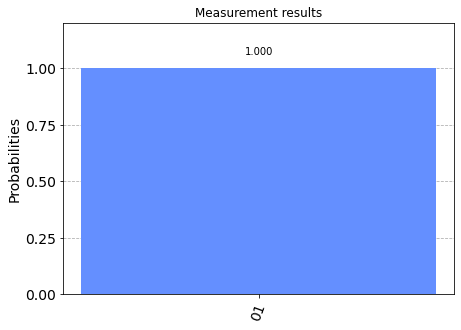

In [63]:
counts = execute(qc03, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

----

### **Important Measurement Note**: 
Bits (Output) are **numbered** from right to left: bx...b4,b3,b2,b1,b0 


So input 10011 => Q(0)=1, Q(1)=0, Q(2)=0, Q(3)=1, Q(4)=1  
Will be output => b(4)=1, b(3)=0, b(2)=0, b(1)=1, b(0)=1

**It doesn't matter how you "number" the input Qubits, but how you save them as outputs**  
Check example below.

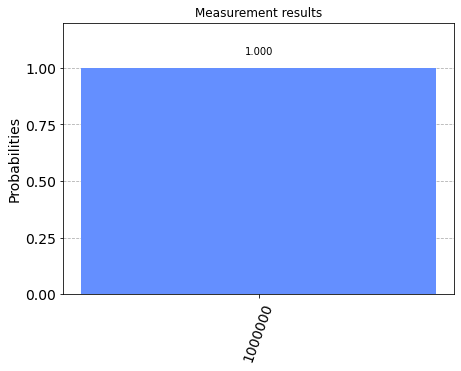

In [108]:
# Measurement 1
# We have 1 Qubit and 7 Output bits
qc_measure01 = QuantumCircuit(1,7)

# Qubit is set to 1
qc_measure01.x(0)

# We save output in bit number 6
qc_measure01.measure(0,6)

# The ouput is the same
counts = execute(qc_measure01, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

#Result: 1000000

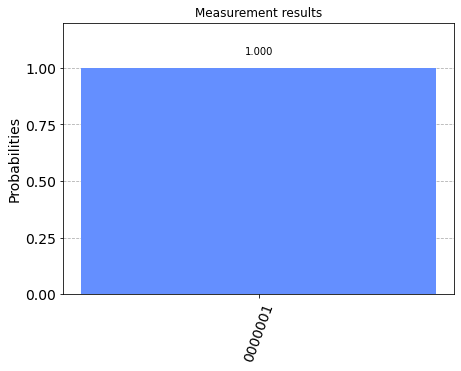

In [110]:
# Measurement 2
# We have 1 Qubit and 7 Output bits
qc_measure02 = QuantumCircuit(1,7)

# Qubit is set to 1
qc_measure02.x(0)

# This time, we save output in bit number 
qc_measure02.measure(0,0)

# The ouput is the same
counts = execute(qc_measure02, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

#Result: 0000001

So **careful** how we save the output.

Also, remember We can *measure* the other way round (measure one qubit before the other or viceversa) and the output would be the same:

In [111]:
# Example
qc03_ex = QuantumCircuit(2,2)
qc03_ex.x(0)
qc03_ex.x(1)
qc03_ex.cx(0,1)

# We do the measurement the other way round
qc03_ex.measure(0,0)
qc03_ex.measure(1,1)

qc03_ex.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

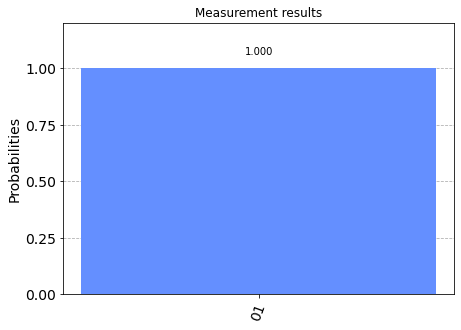

In [68]:
# The ouput is the same
counts = execute(qc03_ex, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

### Histogram
It is also important to note that the numbers shown in the histogram represent the "bit" where the information of that Qubit is stored.

So for example, we can start a Quantum Circuit with 2 Qubits and 5 output bits.    
We will save the output of Qubit 0 in bit 0 and the output of Qubit 1 in bit 5.    
Check the histogram image:

In [101]:
# 2 Qubits and 5 Output bits
qc_hist = QuantumCircuit(2,5)

# To have different values we perform an x in both
qc_hist.x(0)
qc_hist.x(1)

# Save output of Qubit 0 in bit number 0
qc_hist.measure(0,0)
# Save output of Qubit 1 in bit number 4 (the fifth one)
qc_hist.measure(1,4)

qc_hist.draw()

4


┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 5/══════╩══╩═
           0  4

## Half-Adder

We are developing a half-adder.  
The output should be:

- 00 -> 0000
- 01 -> 0110
- 10 -> 0101
- 11 -> 0011

In [130]:
qc_ha = QuantumCircuit(4,4)

# Uncomment one of the four input options to test the output,

# Intput 1: 00
# ---

# Intput 2: 01
# qc_ha.x(1)

# Intput 3: 10
# qc_ha.x(0) 

# Output 4: 11
# qc_ha.x(0) 
# qc_ha.x(1) 

qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

# extract outputs
qc_ha.measure(0,0) # extract XOR value
qc_ha.measure(1,1)
qc_ha.measure(2,2)
qc_ha.measure(3,3)


qc_ha.draw()

┌───┐ ░            ░ ┌─┐         
q_0: ┤ X ├─░───■────────░─┤M├─────────
     └───┘ ░   │        ░ └╥┘┌─┐      
q_1: ──────░───┼────■───░──╫─┤M├──────
           ░ ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░──╫──╫─┤M├───
           ░ └───┘└───┘ ░  ║  ║ └╥┘┌─┐
q_3: ──────░────────────░──╫──╫──╫─┤M├
           ░            ░  ║  ║  ║ └╥┘
c: 4/══════════════════════╩══╩══╩══╩═
                           0  1  2  3

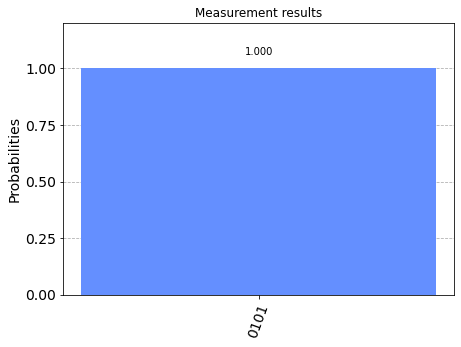

In [131]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

## Toffoli Gate
It is like an AND-Gate in classic computing.  
Output should be:
- 00 -> 00
- 01 -> 01
- 10 -> 01
- 11 -> 10

This basically is implementing a sum!

In [144]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1

# Intput 1: 00
# ---

# Intput 2: 01
# qc_ha.x(1)

# Intput 3: 10
# qc_ha.x(0) 

# Output 4: 11
# qc_ha.x(0) 
# qc_ha.x(1) 

qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw()

░                 ░       
q_0: ─░───■─────────■───░───────
      ░   │         │   ░       
q_1: ─░───┼────■────■───░───────
      ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ─░─┤ X ├┤ X ├──┼───░─┤M├───
      ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ─░───────────┤ X ├─░──╫─┤M├
      ░           └───┘ ░  ║ └╥┘
c: 4/══════════════════════╩══╩═
                           0  1

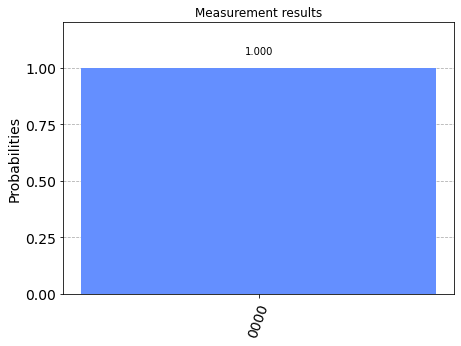

In [145]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts, title = "Measurement results")

----